# Spectrum Basic Test

In [1]:
from pathfinder import Pathfinder

# abs_paths = ['']
# relative_paths = Pathfinder.relative_paths_from_abs(abs_paths)

In [2]:
relative_paths = [['..', '..', '..', '..', '..', '..', '資料科學', 'Allen Downey', 'Think DSP', 'code'], 
                  ['..', '..', '..', '..', 'AutoEq'],
                  ['..', 'codes']]

Pathfinder.append_relative_paths(relative_paths)

In [3]:
%pylab inline 

from drc.sound import *
import thinkdsp

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


# Spectrum

# Noise

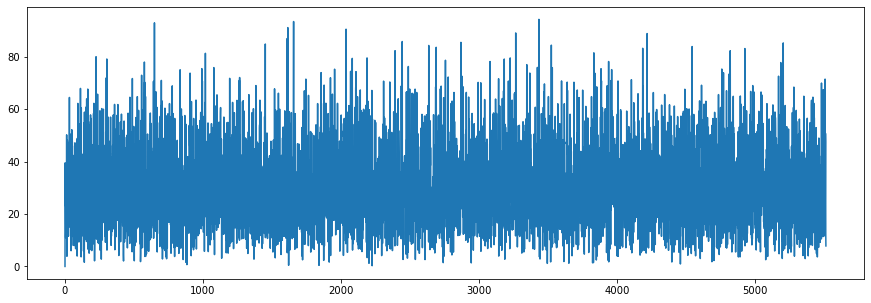

In [4]:
plt.figure(figsize = (15, 5))

signal = thinkdsp.PinkNoise(beta = 0)
sp = signal.make_wave().make_spectrum()
sp.plot()

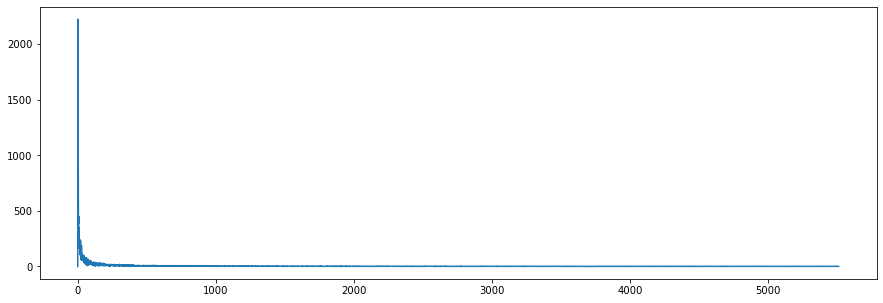

In [5]:
plt.figure(figsize = (15, 5))

signal = thinkdsp.BrownianNoise()
sp = signal.make_wave().make_spectrum()
sp.plot()

# White Noise

In [6]:
from pprint import pprint

pprint(Sound.scan_devices(0))

{'info': {'defaultInputDevice': 1,
          'defaultOutputDevice': 3,
          'deviceCount': 5,
          'index': 0,
          'name': 'MME',
          'structVersion': 1,
          'type': 2},
 'input_devices': {0: {'defaultSampleRate': 44100.0,
                       'maxInputChannels': 2,
                       'maxOutputChannels': 0,
                       'name': 'Microsoft Sound Mapper - Input'},
                   1: {'defaultSampleRate': 44100.0,
                       'maxInputChannels': 2,
                       'maxOutputChannels': 0,
                       'name': '麥克風排列 (Realtek High Definition '}},
 'output_devices': {2: {'defaultSampleRate': 44100.0,
                        'maxInputChannels': 0,
                        'maxOutputChannels': 2,
                        'name': 'Microsoft Sound Mapper - Output'},
                    3: {'defaultSampleRate': 44100.0,
                        'maxInputChannels': 0,
                        'maxOutputChannels': 2,
          

In [7]:
import threading
from drc.measurements import Sampler
from drc.sound import Sound

framerate = 48000

signal = np.zeros(framerate // 1)
signal[0] = 1.0
ch = Channel(signal)
wave = Sound._save_channels([ch, ch], framerate = framerate)

ch_recorded = None

def record():
    global ch_recorded
    ch_recorded = Sampler._get_samples(input_device_idx = 1, chunk_size = framerate // 1,
                                       framerate = framerate, sample_width = 4)    
def play_impulse():
#     ch.play()
    wave.play()
    
t_recording = threading.Thread(target = record)
t_play_impulse = threading.Thread(target = play_impulse)

t_recording.start()
t_play_impulse.start()

t_recording.join()
t_play_impulse.join()

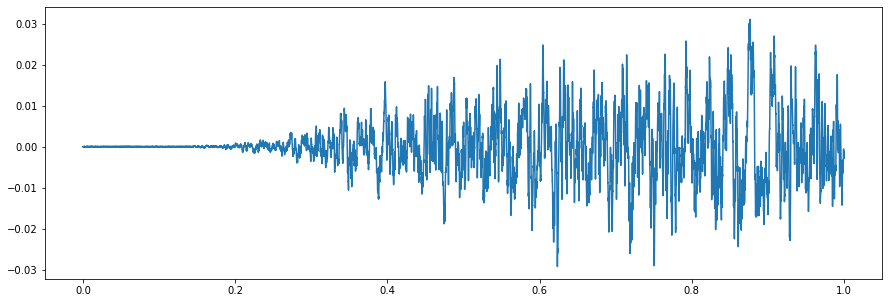

In [8]:
plt.figure(figsize = (15, 5))

ch_recorded.plot()

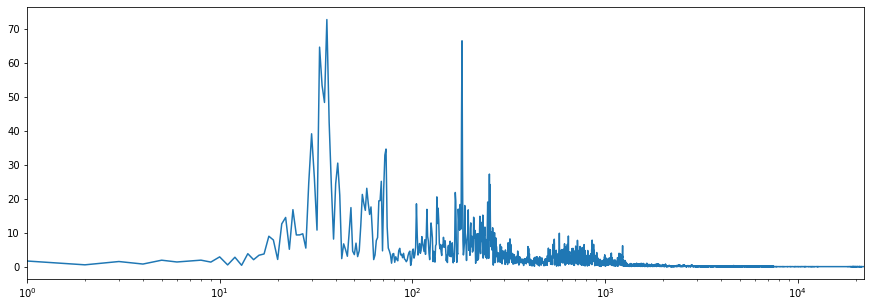

In [9]:
plt.figure(figsize = (15, 5))

ch_recorded.make_spectrum().plot()

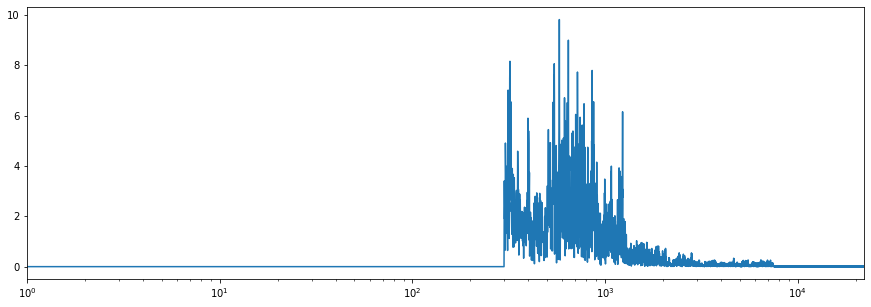

In [10]:
plt.figure(figsize = (15, 5))

ch_recorded.filter(high_pass_cutoff= 300).make_spectrum().plot()

C:\Users\Wei\Dropbox\Coding\notebooks\專案\待處理\DRC\bitbucket\github\codes\drc\sound\__init__.py:399: ComplexWarning: Casting complex values to real discards the imaginary part
  self._play_data(self.data.astype(np.float32) if issubclass(self.data_type.type, np.complex) else


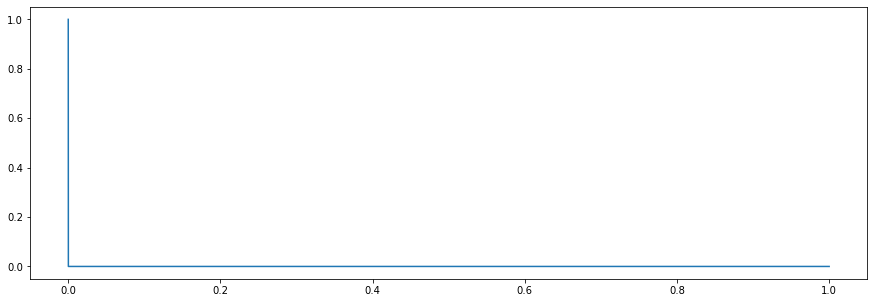

In [11]:
plt.figure(figsize = (15, 5))

signal = np.zeros(DEFAULT_FRAMERATE)
signal[0] = 1.0
ch = Channel(signal)
ch.plot()
ch.play()

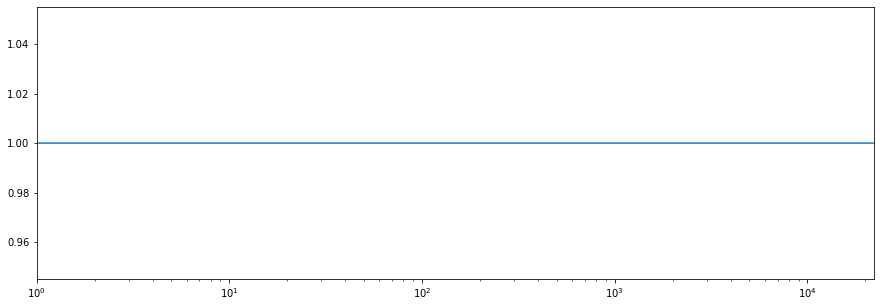

In [12]:
plt.figure(figsize = (15, 5))

sp = ch.make_spectrum()
sp.plot()

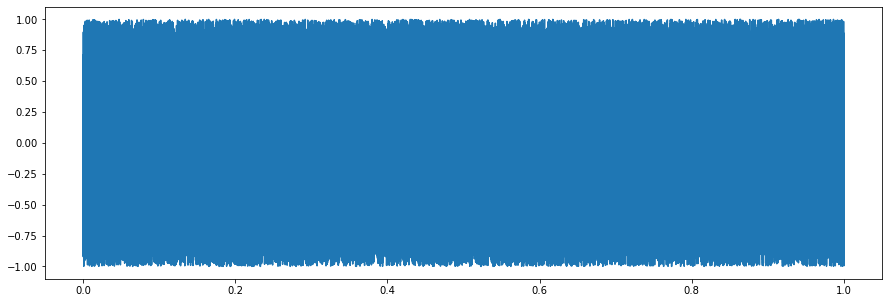

In [13]:
plt.figure(figsize = (15, 5))

signal = thinkdsp.UncorrelatedUniformNoise()
ch = Channel().load_thinkdsp_wave(signal.make_wave(duration = 1, framerate = 48000))
ch.plot()

C:\Softwares\Python\lib\site-packages\numpy\fft\_pocketfft.py:70: ComplexWarning: Casting complex values to real discards the imaginary part
  r = pfi.execute(a, is_real, is_forward, fct)
C:\Users\Wei\Dropbox\Coding\notebooks\專案\待處理\DRC\bitbucket\github\codes\drc\sound\__init__.py:399: ComplexWarning: Casting complex values to real discards the imaginary part
  self._play_data(self.data.astype(np.float32) if issubclass(self.data_type.type, np.complex) else


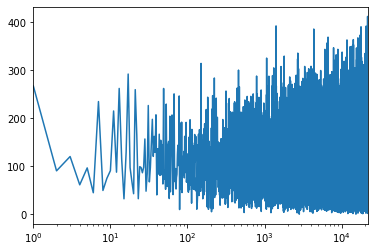

In [14]:
sp = ch.make_spectrum(full = False)
sp.plot()
ch.play()

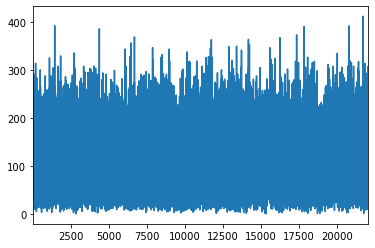

In [15]:
sp.plot()
plt.xscale('linear')

C:\Users\Wei\Dropbox\Coding\notebooks\專案\待處理\AutoEq\autoeq\frequency_response.py:988: RuntimeWarning: divide by zero encountered in log10
  log_f = np.log10(self.frequency)


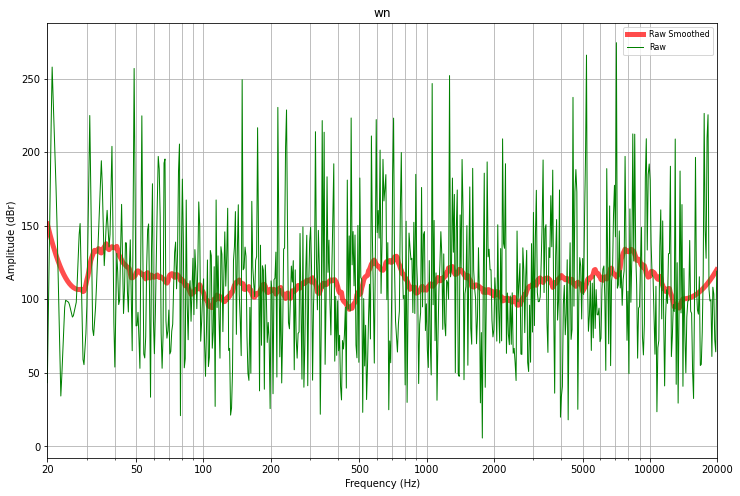

In [16]:
from drc.measurements.frequency.responses import FrequencyResponse

fr = FrequencyResponse('wn', sp.fs, sp.amps)
fr.interpolate()
fr.smoothen_fractional_octave(window_size = 1, treble_window_size = 1)

fr.plot_graph(raw_plot_kwargs={'color': 'green', 'alpha': 1},
              smoothed_plot_kwargs={'color': 'red', 'alpha': 0.7});

# Frequencies (from prime numbers)

In [17]:
def get_prime_numbers(num_min , num_max):
    
    prime_numbers = []
    
    for n in range(num_min, num_max + 1):
        prime = True
        
        for f in range(2, int(n ** (1/2)) + 1):
            if   n % f ==0 :
                prime = False
                break
        if prime:
            prime_numbers.append(n)
            
    return prime_numbers

In [18]:
def get_channel(freq = 440,  amp = 0.1, offset = 0, duration = 1, Fs = 48000):    
    return Channel().load_thinkdsp_wave(thinkdsp.SinSignal(freq = freq, amp = amp, offset = offset).make_wave(duration = duration, framerate = Fs))

In [19]:
freq_range = (1000, 1200)
freqs = get_prime_numbers(*freq_range)
len(freqs)

28

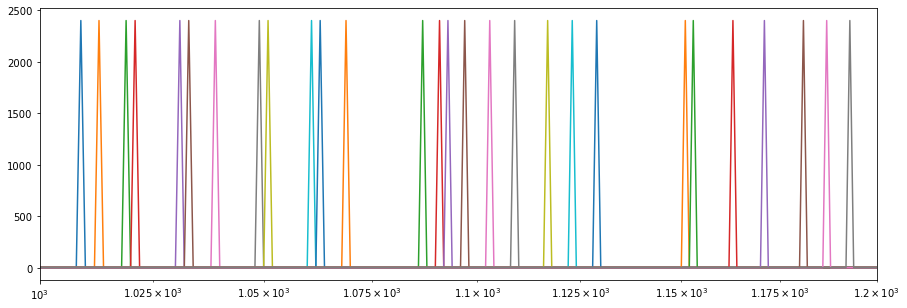

In [20]:
plt.figure(figsize = (15, 5))

chs = [get_channel(f) for f in freqs]

for ch in chs:
    ch.make_spectrum().plot()
    
plt.xlim(freq_range);